## Aplicando Scikit Learn a Iris DataSet

In [15]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.datasets import load_iris

In [16]:
# Cargar el iris dataset
iris = load_iris()

In [17]:
# Bunch es una subclase de la clase Dict y admite todos los métodos como lo hace dict. 
# Además, te permite usar las claves como atributos.
# Agrupa los datos en 'data' y 'target'
#type(iris)
#iris.data

In [18]:
# Crear los X e y
X = iris.data[:,[2,3]]
y = iris.target

In [19]:
test_size = 0.33
seed=7

In [20]:
# Particionar Iris Data en Training(70%) and Test (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

Muchos algoritmos de optimización y aprendizaje automático también requieren escalado de funciones para un rendimiento óptimo.

Aquí, estandarizaremos las características usando la clase StandardScaler del módulo de preprocesamiento de scikit-learn.

In [21]:
# Entrenar el Modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
pred = modelo.predict(X_test)

In [22]:
#Evaluando el desempeño del modelo
acuracia = accuracy_score(y_test, pred)
print('Accuracy: %.2f%%' % ( round(acuracia, 3)*100))

Accuracy: 92.00%


In [23]:
#Construir la Confusion Matrix
clases = [0,1,2]

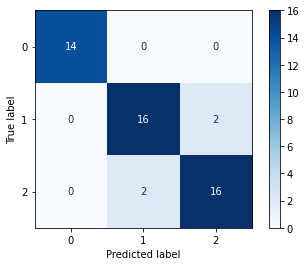

In [24]:
matriz_confusion = plot_confusion_matrix(modelo, X_test, y_test, cmap='Blues', values_format = '.3g')
matriz_confusion

In [25]:
cm = confusion_matrix(y_test, pred, clases)
print(cm)

[[14  0  0]
 [ 0 16  2]
 [ 0  2 16]]


C:\Users\mruizo\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


<ipython-input-27-c30d66c045d8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-27-c30d66c045d8>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


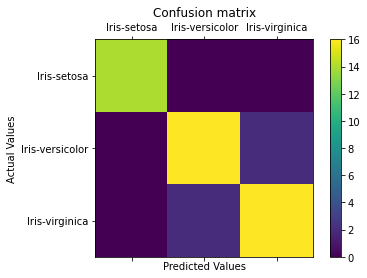

In [27]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Los elementos diagonales representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera, mientras que cualquier cosa fuera de la diagonal fue mal etiquetada por el clasificador. Por lo tanto, cuanto más altos sean los valores diagonales de la matriz de confusión, mejor, indicando muchas predicciones correctas.

En nuestro caso, el clasificador predijo perfectamente las 14 plantas de setosa y 16 de virginica en los datos de prueba. Sin embargo, clasificó incorrectamente 2 de las plantas versicolor como virginica.

## Usando Cross Validation

In [28]:
#cross-validation settings
kfold = model_selection.KFold(n_splits=10)
#Model instance
model = LogisticRegression()
#Evaluate model performance
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print('Accuracy promedio (std): %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Accuracy promedio (std): 94.67% (0.06)


In [29]:
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model
model.fit(X_train, y_train)
#accuracy on test set
result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

Accuracy - test set: 92.00%


La precisión de la clasificación es del 92% en el conjunto de validación.

### Referencias
Inspirado en:
https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico